In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\jeni7\OneDrive\Documents\CTS_Hackathon\dataset\dataset.csv")

In [2]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
readmission_counts = df['readmitted'].value_counts()
print(readmission_counts)

readmitted
no     13246
yes    11754
Name: count, dtype: int64


In [4]:
readmission_percent = readmission_counts / readmission_counts.sum() * 100
print(readmission_percent)

readmitted
no     52.984
yes    47.016
Name: count, dtype: float64


In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\jeni7\OneDrive\Documents\CTS_Hackathon\dataset\dataset.csv")
columns_to_analyze = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
for col in columns_to_analyze:
    print(f"Column: {col}")
    print("-" * (len(col) + 8))
    counts = df[col].astype(str).value_counts(dropna=False)
    percentages = df[col].astype(str).value_counts(normalize=True, dropna=False) * 100
    desc = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    if col in ['diag_2', 'diag_3']:
        print(desc.head(10)) 
    else:
        print(desc)      
    print("\n")


Column: medical_specialty
-------------------------
                        Count  Percentage
medical_specialty                        
Missing                 12382       49.53
InternalMedicine         3565       14.26
Other                    2664       10.66
Emergency/Trauma         1885        7.54
Family/GeneralPractice   1882        7.53
Cardiology               1409        5.64
Surgery                  1213        4.85


Column: diag_1
--------------
                 Count  Percentage
diag_1                            
Circulatory       7824       31.30
Other             6498       25.99
Respiratory       3680       14.72
Digestive         2329        9.32
Diabetes          1747        6.99
Injury            1666        6.66
Musculoskeletal   1252        5.01
Missing              4        0.02


Column: diag_2
--------------
                 Count  Percentage
diag_2                            
Other             9056       36.22
Circulatory       8134       32.54
Diabetes        

In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\jeni7\OneDrive\Documents\CTS_Hackathon\dataset\dataset.csv")
columns_to_analyze = ['diag_2', 'diag_3']
for col in columns_to_analyze:
    print(f"Column: {col}")
    print("-" * (len(col) + 8))
    counts = df[col].astype(str).value_counts(dropna=False)
    percentages = df[col].astype(str).value_counts(normalize=True, dropna=False) * 100
    desc = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    print(desc.head(10))
    print("\n")


Column: diag_2
--------------
                 Count  Percentage
diag_2                            
Other             9056       36.22
Circulatory       8134       32.54
Diabetes          2906       11.62
Respiratory       2872       11.49
Digestive          973        3.89
Injury             591        2.36
Musculoskeletal    426        1.70
Missing             42        0.17


Column: diag_3
--------------
                 Count  Percentage
diag_3                            
Other             9107       36.43
Circulatory       7686       30.74
Diabetes          4261       17.04
Respiratory       1915        7.66
Digestive          916        3.66
Injury             464        1.86
Musculoskeletal    455        1.82
Missing            196        0.78




In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'age' in categorical_cols:
    categorical_cols.remove('age')
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')
print("Missing values handled successfully.")

Numeric columns: 

['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
Categorical columns: ['medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']
Missing values handled successfully.


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() > 1:
        df[col] = le.fit_transform(df[col])


In [9]:
df = pd.get_dummies(df, columns=['diag_2', 'diag_3'], drop_first=True)


In [10]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']


In [12]:
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['age', 'medical_specialty', 'diag_1', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'diag_2_1', 'diag_2_2', 'diag_2_3', 'diag_2_4', 'diag_2_5', 'diag_2_6', 'diag_2_7', 'diag_3_1', 'diag_3_2', 'diag_3_3', 'diag_3_4', 'diag_3_5', 'diag_3_6', 'diag_3_7']


In [13]:
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

In [14]:
print(X.dtypes.value_counts())

bool     38
int64     7
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [16]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'readmitted' in numeric_cols:
    numeric_cols.remove('readmitted')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      2650
           1       0.60      0.58      0.59      2649

    accuracy                           0.60      5299
   macro avg       0.60      0.60      0.59      5299
weighted avg       0.60      0.60      0.59      5299

[[1616 1034]
 [1112 1537]]


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000,
                    learning_rate_init=0.001, random_state=42)

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000,
                    early_stopping=True, random_state=42)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32),
                    max_iter=1000,
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [25]:
df['medications_per_procedure'] = df['n_medications'] / (df['n_procedures'] + 1)

In [26]:
df['time_in_hospital_bin'] = pd.cut(df['time_in_hospital'], bins=[0,3,7,14,30], labels=[0,1,2,3])

In [27]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

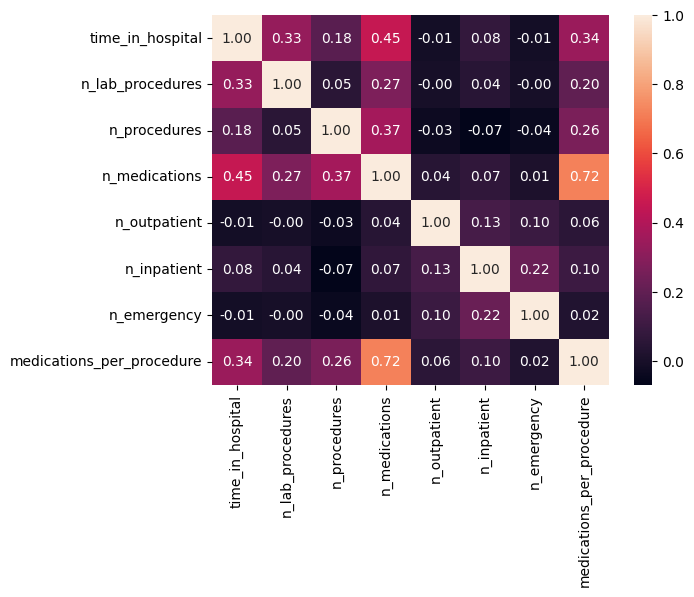

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [29]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01) 
X_selected = selector.fit_transform(X_res)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)
importances = rf.feature_importances_
top_features = X_res.columns[importances > 0.01] 
X_selected = X_res[top_features]


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  
X_res_pca = pca.fit_transform(X_res)

In [32]:
X_res.isnull().sum()

time_in_hospital       0
n_lab_procedures       0
n_procedures           0
n_medications          0
n_outpatient           0
n_inpatient            0
n_emergency            0
age_[50-60)            0
age_[60-70)            0
age_[70-80)            0
age_[80-90)            0
age_[90-100)           0
medical_specialty_1    0
medical_specialty_2    0
medical_specialty_3    0
medical_specialty_4    0
medical_specialty_5    0
medical_specialty_6    0
diag_1_1               0
diag_1_2               0
diag_1_3               0
diag_1_4               0
diag_1_5               0
diag_1_6               0
diag_1_7               0
glucose_test_1         0
glucose_test_2         0
A1Ctest_1              0
A1Ctest_2              0
change_1               0
diabetes_med_1         0
diag_2_1_True          0
diag_2_2_True          0
diag_2_3_True          0
diag_2_4_True          0
diag_2_5_True          0
diag_2_6_True          0
diag_2_7_True          0
diag_3_1_True          0
diag_3_2_True          0


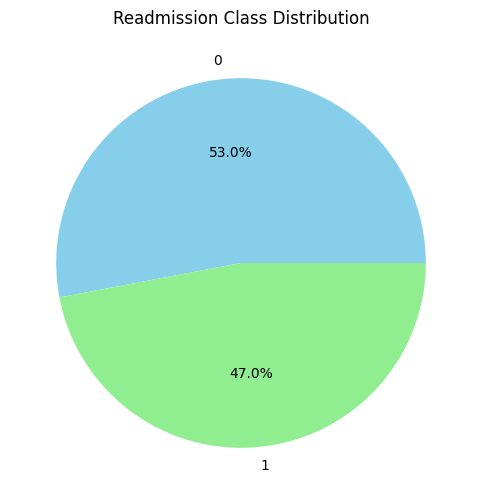

In [33]:
import matplotlib.pyplot as plt
class_counts = y.value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Readmission Class Distribution')
plt.show()

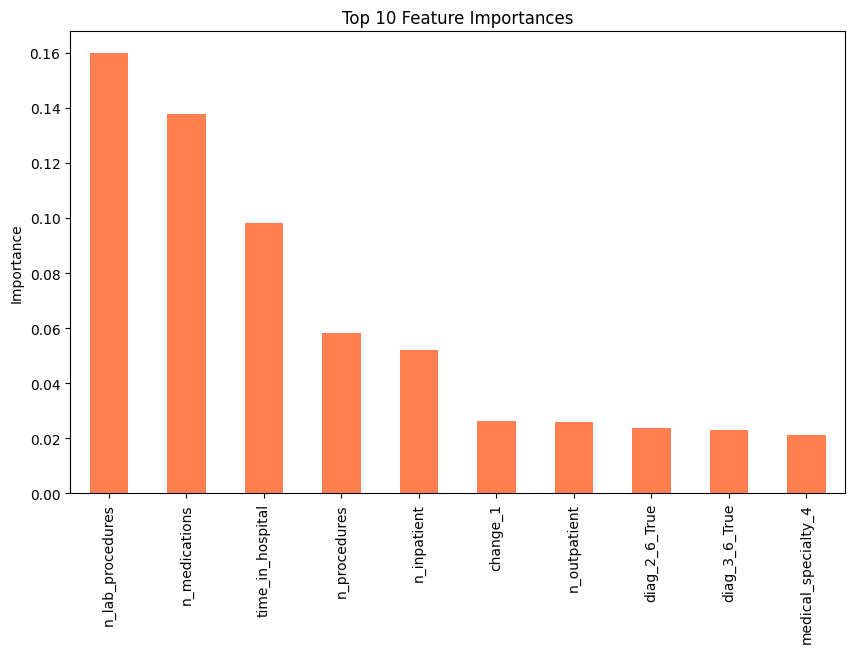

In [34]:
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=X_res.columns)  
importances = pd.Series(rf.feature_importances_, index=X_train_df.columns)
top_features = importances.sort_values(ascending=False).head(10)
top_features.plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"MLP Accuracy: {accuracy_mlp:.4f}")

Logistic Regression Accuracy: 0.6194
Decision Tree Accuracy: 0.5424
MLP Accuracy: 0.6254


In [37]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from catboost import CatBoostClassifier, Pool
X = df.drop('readmitted', axis=1)
y = df['readmitted']
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [39]:
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


In [40]:
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

In [41]:
print(X_train.isnull().sum().sum(), y_train.isnull().sum())

9127 0


In [42]:
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
    X_train[col] = X_train[col].fillna('Unknown')
    X_test[col] = X_test[col].fillna('Unknown')
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [43]:
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=100
)

cat_model.fit(
    X_train, y_train,
    cat_features=cat_features_indices,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    use_best_model=True
)


0:	learn: 0.5085058	test: 0.5072682	best: 0.5072682 (0)	total: 285ms	remaining: 2m 22s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5354218583
bestIteration = 3

Shrink model to first 4 iterations.


In [45]:
from catboost import CatBoostClassifier, Pool
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features_indices)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features_indices)

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    class_weights=list(class_weights.values()),
    verbose=100,
    random_seed=42
)

grid = {'depth': [4, 6, 8], 'l2_leaf_reg': [3, 5, 7]}

cat_model.grid_search(
    param_grid=grid,
    X=train_pool,     
    cv=3
)


NameError: name 'class_weights' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred_cat = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cat)
print("Accuracy:", round(accuracy, 4))

precision = precision_score(y_test, y_pred_cat, average='binary', pos_label=1)
print("Precision:", round(precision, 4))

recall = recall_score(y_test, y_pred_cat, average='binary', pos_label=1)
print("Recall:", round(recall, 4))

f1 = f1_score(y_test, y_pred_cat, average='binary', pos_label=1)
print("F1 Score:", round(f1, 4))

print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))


Accuracy: 0.4715
Precision: 0.4708
Recall: 1.0
F1 Score: 0.6402

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      5298
           1       0.47      1.00      0.64      4702

    accuracy                           0.47     10000
   macro avg       0.74      0.50      0.32     10000
weighted avg       0.75      0.47      0.30     10000

